In [134]:
#importing necessary packages
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from pathlib import Path
import os, pickle

In [135]:
#Loading pickle files

file_path_X = open(os.path.join(r"C:\Users\NAMITHA\Ancient-Tamil-Script-Recognition-master\Model-Creation\X.pickle"), 'rb')
file_path_Y = open(os.path.join(r"C:\Users\NAMITHA\Ancient-Tamil-Script-Recognition-master\Model-Creation\Y.pickle"), 'rb')
X = pickle.load(file_path_X)
y = np.array(pickle.load(file_path_Y))

In [136]:
number_of_classes = max(y) + 1 #Number of classes

In [137]:
X = X/255.0 #Normalising the images

In [138]:
print(X.shape)

(4561, 50, 50, 1)


In [139]:
# Building the model
model = Sequential()
# convolutional layers
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# hidden layers
model.add(Flatten()) 
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer for given number of classes
model.add(Dense(number_of_classes))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# Training the model, with 40 iterations
history = model.fit(X, y, batch_size=10, epochs=40, validation_split=0.1)

Epoch 1/40
411/411 [==============================] - 19s 40ms/step - loss: 4.3350 - accuracy: 0.0258 - val_loss: 4.2565 - val_accuracy: 0.0284
Epoch 2/40
411/411 [==============================] - 16s 38ms/step - loss: 4.2721 - accuracy: 0.0285 - val_loss: 4.2421 - val_accuracy: 0.0284
Epoch 3/40
411/411 [==============================] - 16s 38ms/step - loss: 4.2601 - accuracy: 0.0275 - val_loss: 4.2495 - val_accuracy: 0.0372
Epoch 4/40
411/411 [==============================] - 17s 40ms/step - loss: 4.2614 - accuracy: 0.0273 - val_loss: 4.2334 - val_accuracy: 0.0416
Epoch 5/40
411/411 [==============================] - 16s 39ms/step - loss: 4.2527 - accuracy: 0.0312 - val_loss: 4.1758 - val_accuracy: 0.0525
Epoch 6/40
411/411 [==============================] - 16s 40ms/step - loss: 4.1285 - accuracy: 0.0480 - val_loss: 3.9441 - val_accuracy: 0.0678
Epoch 7/40
411/411 [==============================] - 16s 39ms/step - loss: 3.9571 - accuracy: 0.0609 - val_loss: 3.7941 - val_accuracy:

In [131]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 activation_164 (Activation)  (None, 48, 48, 64)       0         
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 22, 22, 32)        18464     
                                                                 
 activation_165 (Activation)  (None, 22, 22, 32)       0         
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                

In [132]:
#Saving the model in local machine
model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN')
print("Saved CNN model to disk")

Saved model to disk


INFO:tensorflow:Assets written to: CNN\assets


INFO:tensorflow:Assets written to: CNN\assets


Saved CNN model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


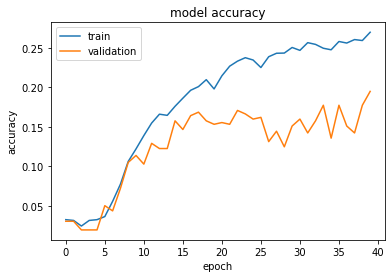

In [133]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')